<a href="https://colab.research.google.com/github/lisatwyw/data-gym/blob/master/dimRedux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview # 

This is a demo code to run TSNE (for data-dimensionality reduction).


In [24]:

import numpy as np
from sklearn.manifold import TSNE

import random

X  = np.random.randint(0,2, (2000,45,16))
X.shape 

(2000, 45, 16)

In [26]:
try:
  import umap
except:
  ! pip install umap
  
try:
  import tsne
except:
  ! pip install tsne


  Created wheel for tsne: filename=tsne-0.1.8-cp36-cp36m-linux_x86_64.whl size=226369 sha256=c80fb9277952eadd5a4c39440854324fe2907fb09c30efa3256aafde6e455f90
  Stored in directory: /root/.cache/pip/wheels/69/b4/26/9a673d2333de6af3865b5a2b462b3b0cfe4556ae69979434dd
Successfully built tsne


In [23]:
X_reshaped = np.reshape(X, (X.shape[0], X.shape[1]*X.shape[2]))
X_reshaped.shape

(2000, 720)

In [55]:
import time

t2=time.perf_counter()
embeddings = dict()
embeddings['umap'] = umap.UMAP().fit_transform( X_reshaped )    
t1=time.perf_counter()

embeddings['umap'].shape

print( 'Took', ( t1 - t2 ), 'seconds for UMap to complete')

ERROR! Session/line number was not unique in database. History logging moved to new session 60
Took -5.786973995000153 seconds


In [56]:
t4=time.perf_counter()
embeddings['tsne'] = TSNE(n_components=2).fit_transform(X_reshaped )
t3=time.perf_counter()
print( 'Took', ( t3 - t4 ), 'seconds for TSNE to complete')

ERROR! Session/line number was not unique in database. History logging moved to new session 61
Took 22.334589223999956 seconds for TSNE to complete


ERROR! Session/line number was not unique in database. History logging moved to new session 59


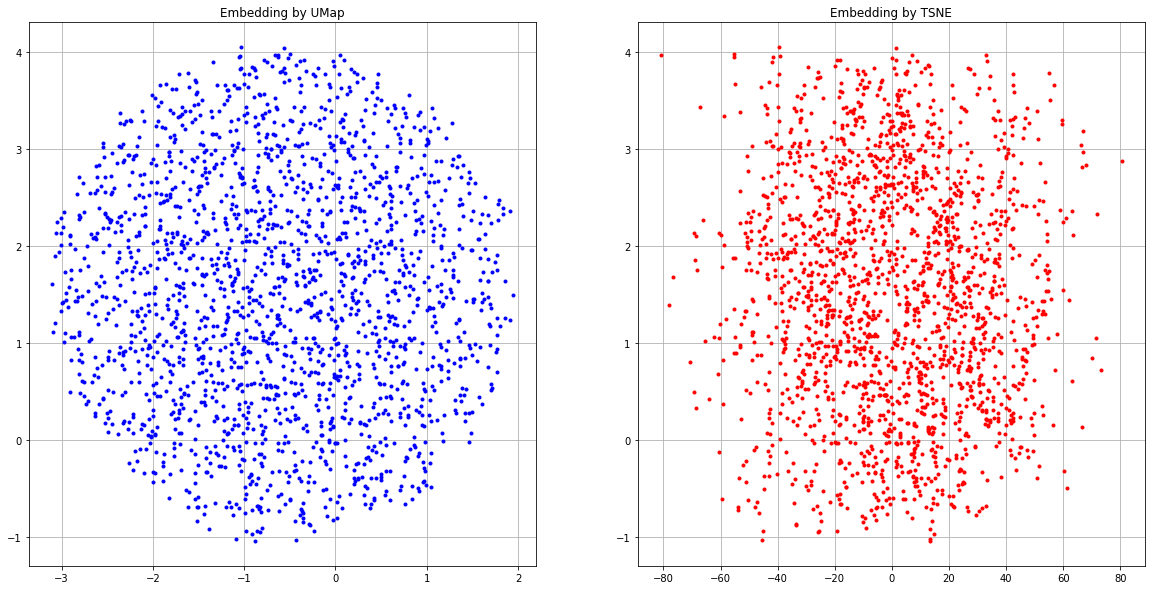

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 20,10 ))  
axes=fig.subplots(1,2)   

t1=time.perf_counter()
 
axes[0].plot(embeddings['umap'][:,0], embeddings['umap'][:,1], 'b.', label='UMAP')
axes[0].set_title('Embedding by UMap')
axes[0].grid()
axes[1].plot(embeddings['tsne'][:,0], embeddings['umap'][:,1], 'r.', label='TSNE')
axes[1].set_title('Embedding by TSNE')
axes[1].grid()


In [0]:
if 0:
  clrs=['r','g','b','m', 'c', 'k' ]

  for i, c in enumerate( ['1','2','3', '4', ] ):  
      q = np.where( v_label_annotations == c )[0]    
      plt.plot( v_embedded[q,0], v_embedded[q,1], color=clrs[i], label=c )
    
  plt.legend()    
  plt.savefig( 'tsne-embedding.png' )
